# License 
***
Copyright (C) 2018 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

***
## Simple multilayer perception (MLP) example

In [1]:
# imports
import urllib.request as urllib2
import numpy as np
import pandas as pd

#### Set simple hyperparameters

In [2]:
LEARN_RATE = 0.005
ITERATIONS = 600
HIDDEN_UNITS = 30

#### Fetch simple Iris dataset

In [3]:
# load and preprocess Iris data set 
# easy binomial classification task: seperate Setosa irises from Versicolor irises

# fetch data from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
connection = urllib2.urlopen(url)
raw = connection.read()

# initialize empty X and y arrays
X = np.zeros((100, 4))
y = np.zeros((100, 1))

# load iris data into X and y arrays 
row_idx = 0
for line in str(raw)[2:-5].split('\\n'):
    line = line.replace('Iris-setosa', '1').replace('Iris-versicolor', '0')
    line = line.split(',')
    # remove Virginica irises from data set
    if line[-1] != 'Iris-virginica':
        line = np.asarray(line)
        X[row_idx, :] = line[:-1]
        y[row_idx, :] = line[-1]
        row_idx += 1

        
print('Data inputs:\n', X)
print('\n')
print('Data target:\n', y)

Data inputs:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

#### Training routine

In [4]:
# very simple MLP routine
# with logistic activation for hidden and output layer

# set random seed
# always do this when working with random numbers
np.random.seed(12345)

# randomly initialize our weights with mean 0
hidden_weights = np.random.random((4, HIDDEN_UNITS)) - 0.5 # 4 X HIDDEN_UNITS weights in hidden layer
output_weights = np.random.random((HIDDEN_UNITS, 1)) - 0.5 # HIDDEN_UNITS X 1 weights in output layer

print('MLP architecture is: 4 input units -> %d hidden units -> 1 output units.' % HIDDEN_UNITS)
print()
print('There are %d hidden weights to optimize.' % (4 * HIDDEN_UNITS))
print('Initial hidden weights:\n', hidden_weights)
print()
print('There are %d output weights to optimize.' % HIDDEN_UNITS)
print('Initial output weights:\n', output_weights)

# initialize empty pandas DataFrame to hold iteration scores
iter_frame = pd.DataFrame(columns=['Iteration', 'Error'])

# activation function
def logistic_activation_function(weights_times_inputs):

    return 1 / (1 + np.exp(-weights_times_inputs))

# trainign loop
for iteration in range(0, ITERATIONS):

    ### feed-forward phase ##########
    # run data through input, hidden, and output layers
    
    input_layer = X
    hidden_layer = logistic_activation_function(np.dot(input_layer, hidden_weights))
    output_layer = logistic_activation_function(np.dot(hidden_layer, output_weights))
    
    if iteration == 0:
        print('\nInitial yhat:\n', output_layer)
        print()    
        print('Training ...')
            
    ### evaluate error function ##########
    output_logloss_error = -y * np.log(output_layer) + (1 - y)*np.log(1 - output_layer)
    if ((iteration + 1) % 100) == 0:
        print('Iteration %4i, Error: %5.2f' % (iteration + 1, np.sum(output_logloss_error)))
    
    # record iteration and error
    iter_frame = iter_frame.append({'Iteration': iteration,
                                    'Error': np.sum(output_logloss_error)}, 
                                   ignore_index=True)    
        
    ### back-propogation phase ##########
    # back-propogate error from output layer to hidden layer 
    # weight's output delta and input activation are multiplied to find the gradient of the weights
    # due to chain rule
    
    output_loss_gradient = output_layer - y # logloss derivative
    output_layer_gradient = output_layer * (1 - output_layer) # output sigmoid derivative
    output_input = hidden_layer # linear combo derivative
    output_total_gradient = output_input.T.dot(output_loss_gradient * output_layer_gradient)
    
    hidden_loss_gradient = output_loss_gradient.dot(output_weights.T) # backprop error/logloss derivative
    hidden_layer_gradient = hidden_layer * (1 - hidden_layer) # hidden sigmoid derivative
    hidden_input = input_layer # linear combo derivative
    hidden_total_gradient = hidden_input.T.dot(hidden_loss_gradient * hidden_layer_gradient)
    
    ### update weights based on gradient ##########
    # update weights in direction that minimizes error using layerwise gradients
    # (input layer is never updated, b/c it is the data itself)
    # scale by learning rate
    output_weights -= LEARN_RATE * output_total_gradient
    hidden_weights -= LEARN_RATE * hidden_total_gradient

print('Maximum iterations reached, done.')

MLP architecture is: 4 input units -> 30 hidden units -> 1 output units.

There are 120 hidden weights to optimize.
Initial hidden weights:
 [[ 4.29616093e-01 -1.83624445e-01 -3.16081188e-01 -2.95439721e-01
   6.77250291e-02  9.55447030e-02  4.64514520e-01  1.53177097e-01
   2.48906638e-01  1.53569871e-01  2.47714809e-01  4.61306736e-01
  -4.91611702e-01 -3.93555623e-01 -2.01296286e-01  1.56411183e-01
   3.09812553e-01  3.72175914e-01  4.64647597e-01  2.23685347e-01
   1.42475328e-01  2.17453621e-01 -3.24009928e-02 -1.74415322e-01
  -6.03553941e-02  2.29689083e-01  4.94014586e-01  1.76873712e-01
   2.90822518e-01 -3.29085742e-01]
 [-4.73150724e-01  3.00370244e-01  4.03722538e-01 -4.75323790e-01
  -8.25268155e-03  2.62551673e-02  9.63660104e-02 -4.48042455e-01
   3.95089528e-01  2.28266180e-01  3.18350011e-01  2.22752834e-04
   3.10189409e-01 -4.04031474e-01 -2.81049956e-01 -2.41280938e-01
  -3.18942460e-02 -4.06267974e-02  2.09509780e-01 -3.21946994e-01
   3.14498844e-02 -3.32257771e-0

#### Analyze results

In [5]:
y_yhat_frame = pd.DataFrame(columns = ['y', 'yhat'])
y_yhat_frame['y'] = y.reshape(-1)
y_yhat_frame['yhat'] = output_layer.reshape(-1)
y_yhat_frame

,y,yhat
0,1.0,0.984989
1,1.0,0.977354
2,1.0,0.982045
3,1.0,0.973939
4,1.0,0.985555
5,1.0,0.983661
6,1.0,0.981078
7,1.0,0.981839
8,1.0,0.970961
9,1.0,0.977764


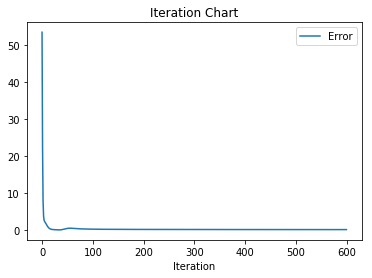

In [6]:
%matplotlib inline
_ = iter_frame.plot(kind='line', x='Iteration', y='Error', title='Iteration Chart')